### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [51]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [52]:
data = pd.read_csv('data/coupons.csv')
data.shape

(12684, 26)

In [53]:
#Increasing the number of columns to show all
pd.options.display.max_columns = 26

In [54]:
data.sample(3)
#data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2431,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,0,Bachelors degree,Management,$12500 - $24999,NaN,1~3,gt8,gt8,1~3,less1,1,0,0,0,1,1
2342,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,31,Married partner,1,Some college - no degree,Education&Training&Library,$50000 - $62499,NaN,less1,1~3,4~8,4~8,less1,1,1,0,0,1,1
8221,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Male,50plus,Widowed,0,Some college - no degree,Installation Maintenance & Repair,Less than $12500,NaN,never,never,1~3,less1,less1,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [55]:
#Checking the number of null values per column
data.isnull().sum().sort_values().tail(6)

Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

In [56]:
#Let us see how many null values there are for car compared to the total data size
(data.isnull().sum().sort_values()["car"])/(data.shape[0])

0.9914853358561968

99% of the car column is empty as indicated above

3. Decide what to do about your missing data -- drop, replace, other...

Since majority of the car column is empty, let us drop it

In [57]:
data_clean = data.drop( columns = ['car'])
data_clean.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8463,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,1d,Female,50plus,Married partner,1,Some college - no degree,Personal Care & Service,$87500 - $99999,never,gt8,less1,1~3,less1,1,1,0,0,1,1
1189,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$100000 or More,1~3,gt8,4~8,gt8,4~8,1,1,1,0,1,1
12246,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,50plus,Married partner,1,Some college - no degree,Business & Financial,$100000 or More,less1,1~3,4~8,1~3,1~3,1,0,0,0,1,1


4. What proportion of the total observations chose to accept the coupon? 



In [58]:
#data.shape[0] # this provided the total numnber of rows
#data.query("Y == 1").shape[0] # number of rows that accepted the coupon
prob_accepting = (data.query("Y == 1").shape[0])/(data.shape[0])
prob_accepting

0.5684326710816777

About 56% users will drive there ‘right away’ or ‘later before the coupon expires’

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Bar chart of coupons by type and gender of driver')

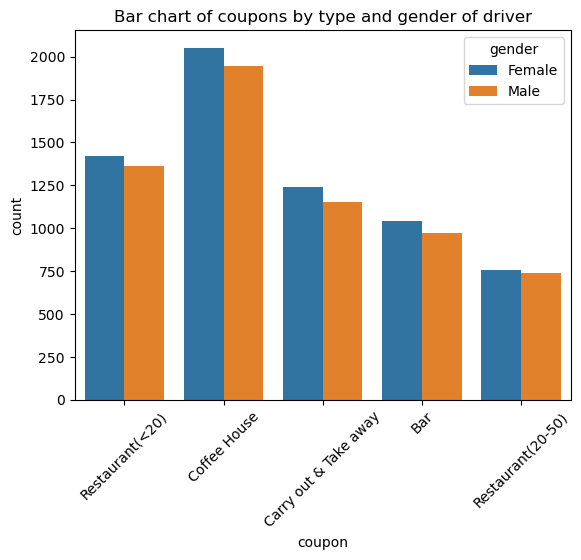

In [59]:
sns.countplot(data_clean, x='coupon', hue = 'gender')
plt.xticks(rotation=45)
plt.title("Bar chart of coupons by type and gender of driver")

The bar chart above utilizes seaborn to illustrates how many coupons by type and it shows how many was male and female

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature (F)')

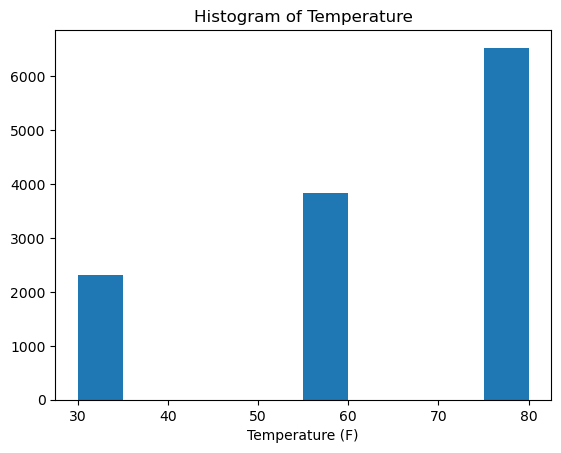

In [60]:
plt.hist(data_clean['temperature'])
plt.title("Histogram of Temperature")
plt.xlabel("Temperature (F)")

The histogram above used matplotlib.pyplot to illustrate the varied temperature during the drive

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [61]:
bar_df= data_clean[data_clean["coupon"]== 'Bar']

2. What proportion of bar coupons were accepted?


In [62]:
# bar_df.query("Y == 1").shape[0] is the number of users that accepted the bar coupon
# bar_df.shape[0] is the number of people with the bar coupon

prob_bar = (bar_df.query("Y == 1").shape[0])/(bar_df.shape[0])
prob_bar

0.41001487357461575

The above calculation show that 41% of users with bar coupon accepted it. illustrated by a pie chart below

In [63]:
coup_bar_accept = bar_df["Y"].value_counts()
coup_bar_accept

Y
0    1190
1     827
Name: count, dtype: int64

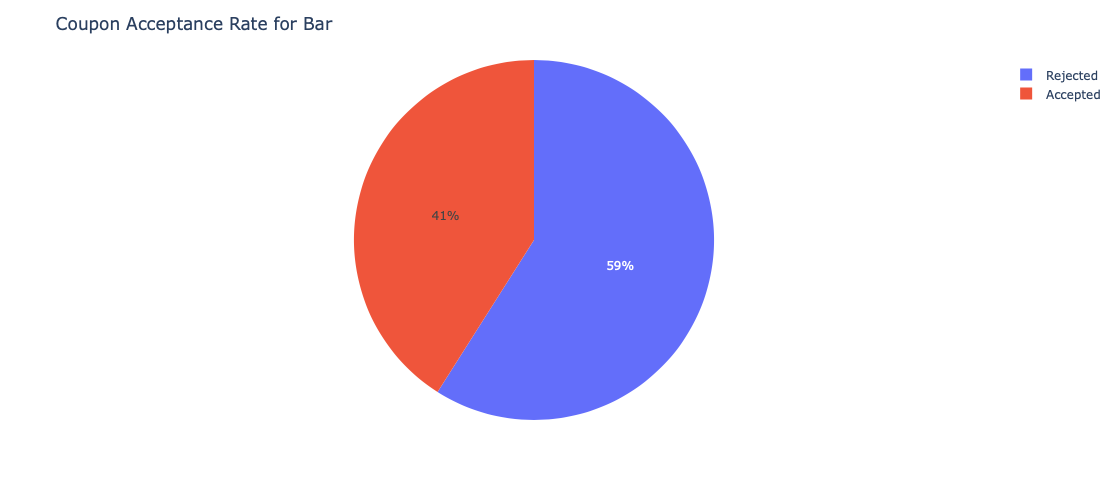

In [64]:
#Creating a dataframe to use for piechart
bar_counts = [['Accepted', 827],['Rejected', 1190]]
bar_acceptance = pd.DataFrame(bar_counts, columns=['Coupon', 'Numbers'])

# Use the numbers to create a piechart
pie_chart = px.pie(bar_acceptance, values='Numbers', names='Coupon')
pie_chart.update_layout(
    title_text="Coupon Acceptance Rate for Bar",    autosize=False,
    width=500,
    height=500)
pie_chart.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [65]:
#Getting the unique values of the bar frequencies
bar_df["Bar"].unique() 

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [66]:
# a list of frequencies to the bar 3 or fewer times a month
bar_freq_3orless = ['never', 'less1', '1~3'] 

# total of who went to the bar 3 times or less
total_3orless = bar_df.query("Bar in @bar_freq_3orless and Y ==1")["Bar"].value_counts().sum() 

#Acceptance rate of those who went 3 times or less
acceptance_3orless = total_3orless / (bar_df.shape[0])
acceptance_3orless

0.330193356470005

In [67]:
# a list of frequencies to the bar 4 times and more
bar_freq_morethan3 = ['gt8','4~8']

# Total of those who went to the bar more than 3 times
total_morethan3 = bar_df.query("Bar in @bar_freq_morethan3 and Y ==1")["Bar"].value_counts().sum()

#Acceptance rate of those who went more than 3 times
acceptance_morethan3 = total_morethan3 / (bar_df.shape[0])
acceptance_morethan3

0.07585523054040655

The above acceptance rate above is for people who went 3 or fewer times a month and those who went more compared to the total whose coupons was Bar. Therefore 33% of the people whose coupon is Bar goes 3 or fewer times while 7.5 % goes more than 3 times

In [68]:
acceptance_3orless_vs_total_accepted = total_3orless /(bar_df.query("Y == 1").shape[0])
acceptance_3orless_vs_total_accepted

0.8053204353083434

In [69]:
acceptance_morethan3_vs_total_accepted = total_morethan3 / (bar_df.query("Y == 1").shape[0])
acceptance_morethan3_vs_total_accepted

0.18500604594921402

The above acceptance rate above is for people who went 3 or fewer times a month and those who went more compared to the total who accepted the coupon. Therefore 80% of the people that accepted the Bar coupon goes 3 or fewer times while 18.5% goes more than 3 times

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [70]:
#Just getting a sense of the ages of the drivers
bar_df["age"].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [71]:
# hand writting the bar frequencies and ages since they are not numeric values
bar_morethanonce = ['1~3', 'gt8', '4~8']
age_over25 = ['46', '26', '31', '41', '50plus', '36']

# count how many people go more than onece and over age 25
total_morethanonce_over25 = bar_df.query("Bar in @bar_morethanonce and Y ==1 and age in @age_over25 ")["Bar"].value_counts().sum()

#Getting the portion of the total bar coupon
acceptance_morethanonce_over25 = total_morethanonce_over25 / (bar_df.shape[0])
acceptance_morethanonce_over25

0.14476945959345563

In [72]:

#Getting the portion of the total that accepted bar coupon
acceptance_morethanonce_over25_vs_total_accepted = total_morethanonce_over25 / (bar_df.query("Y == 1").shape[0])
acceptance_morethanonce_over25_vs_total_accepted

0.35308343409915355

Therefore, the 14.4% of the total who got Bar coupon is over the age of 25 and goes to bar more than once a month
Which makes up for 35% of those who accepted the coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [73]:
bar_morethanonce = ['1~3', 'gt8', '4~8']
occupation = ['Farming Fishing & Forestry']
not_kids = ['Kid(s)']

# More than once and accepted the coupon
morethan1_nokids = bar_df.query("Bar in @bar_morethanonce and Y ==1")

#no kids and occupation is Farming Fishing & Forestry
morethan1_nokids = morethan1_nokids[~morethan1_nokids.occupation.isin(occupation) & ~morethan1_nokids.passanger.isin(['Kid(s)'])] 

# counts them
total_bar_morethan1_nokids = morethan1_nokids["Bar"].value_counts().sum() 

#Acceptance rate out of all coupons
acceptance_bar_morethan1_nokids = total_bar_morethan1_nokids / (bar_df.shape[0])
acceptance_bar_morethan1_nokids


0.19484382746653445

In [74]:
#Acceptance rate out of all coupons accepted
acceptance_bar_morethan1_nokids_vs_total_accepted = total_bar_morethan1_nokids / (bar_df.query("Y == 1").shape[0])
acceptance_bar_morethan1_nokids_vs_total_accepted

0.4752116082224909

Therefore, they make up off 19% of total population with Bar coupon and which is 47% of them who accepted the coupon

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



6a. Go to bars more than once, had passengers that were not a kid, and were not widowed

In [75]:

bar_morethanonce = ['1~3', 'gt8', '4~8']
age_below30 = ['21','26', 'below21']
cheap_rest_gt4 = ['4~8', 'gt8']
lessthan_50kincome = ['$37500 - $49999','$12500 - $24999','$25000 - $37499', 'Less than $12500' ]
#Go to the bar more than once
bar_gt1 = bar_df.query("Bar in @bar_morethanonce and Y ==1 ")

#No kids and widowed
bar_gt1_nokid_notwidowed= bar_gt1[~bar_gt1.passanger.isin(['Kid(s)']) & ~bar_gt1.maritalStatus.isin(['Widowed'])]["Bar"].value_counts().sum()
acceptance_bar_gt1_nokid_notwidowed = bar_gt1_nokid_notwidowed / (bar_df.shape[0])
acceptance_bar_gt1_nokid_notwidowed

0.19484382746653445

6b. Go to bars more than once a month and are under the age of 30

In [76]:
bar_gt1_under30 = bar_gt1[bar_gt1.age.isin(age_below30)]["Bar"].value_counts().sum()
accpetance_bar_gt1_under30 = bar_gt1_under30 / (bar_df.shape[0])
accpetance_bar_gt1_under30

0.12345066931085771

6c. Go to cheap restaurants more than 4 times a month and income is less than 50K.

In [77]:
income_lt50k_rest_gt4 = bar_df.query("RestaurantLessThan20 in @cheap_rest_gt4 and Y ==1 and income in @lessthan_50kincome")["Bar"].value_counts(dropna=False).sum()
acceptance_income_lt50k_rest_gt4 = income_lt50k_rest_gt4 / (bar_df.shape[0])

acceptance_income_lt50k_rest_gt4


0.07734258800198314

In [78]:
#Created a dataframe of all the findings
acceptance_rate = pd.DataFrame({'bar_gt1_nokid_notwidowed' : [acceptance_bar_gt1_nokid_notwidowed],
                               'bar_gt1_under30' : [accpetance_bar_gt1_under30],
                               'income_lt50k_rest_gt4' : [acceptance_income_lt50k_rest_gt4]})
acceptance_rate

,bar_gt1_nokid_notwidowed,bar_gt1_under30,income_lt50k_rest_gt4
0,0.194844,0.123451,0.077343


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

19% of the population that has the coupon go to bars more than once a month, had passengers that were not a kid, and were not widowed 
12%  Go to bars more than once a month and are under the age of 30
7.7% Go to cheap restaurants more than 4 times a month and income is less than 50K.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating the coffee house

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [79]:
coffee_df= data_clean[data_clean["coupon"]== 'Coffee House']

2. What proportion of coffee house coupons were accepted?

In [80]:
#Getting a count of those who accepted and rejected the coupon
coup_accept = coffee_df["Y"].value_counts()
coup_accept

Y
0    2001
1    1995
Name: count, dtype: int64

In [81]:
# Create a dataframe of these numbers
counts = [['Accepted', 1995],['Rejected', 2001]]
coffee_House = pd.DataFrame(counts, columns=['Coupon', 'Numbers'])

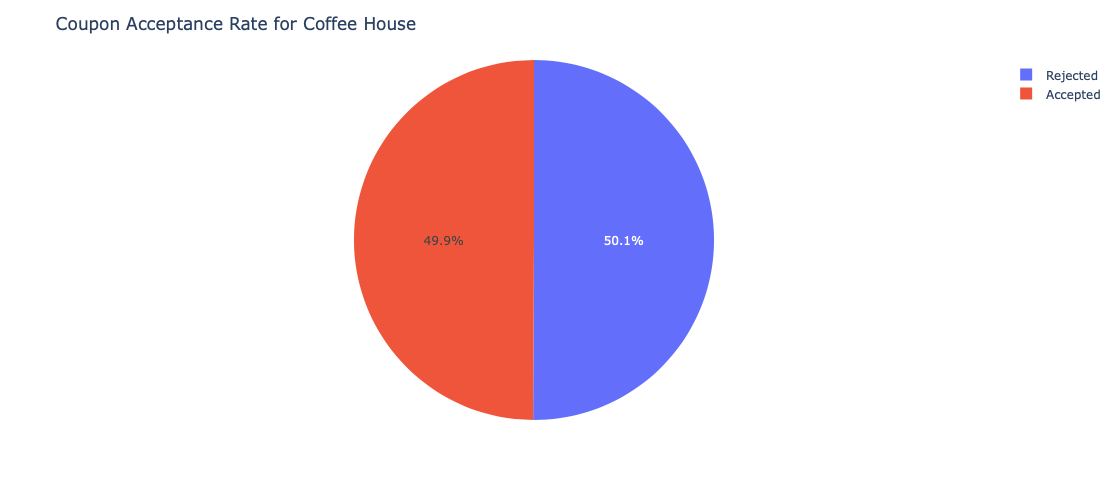

In [82]:
# Use the numbers to create a piechart
pie_chart = px.pie(coffee_House, values='Numbers', names='Coupon')
pie_chart.update_layout(
    title_text="Coupon Acceptance Rate for Coffee House",    autosize=False,
    width=500,
    height=500)
pie_chart.show()

49% of those with a coffee coupon accepted it. 

3. What proportion of bar coupons were accepted and destination is work?

In [83]:

total_coffee_work = coffee_df.query("destination in ['Work'] and Y ==1 ")["CoffeeHouse"].value_counts().sum()
acceptance_coffee_work = total_coffee_work / (coffee_df.shape[0])
acceptance_coffee_work

0.1006006006006006

10% of people that accepted the coupon are heading to work

4. What was the proportion that weather was Sunny and destination was work for coupons accepted?

In [84]:
total_coffee_sunny_work = coffee_df.query("Y ==1 and destination in ['Work'] and weather in ['Sunny'] ")["weather"].value_counts().sum()
acceptance_coffee_sunny_work = total_coffee_sunny_work / (coffee_df.shape[0])
acceptance_coffee_sunny_work

0.08658658658658659

In [85]:
total_coffee_sunny_work/coffee_df.query("Y == 1").shape[0]

0.17343358395989975

Out of all who got the coffee coupon 8.65% of them are heading to work on a sunny day
Out of all who accepted the coffee coupon 17.3% of them are heading to work on a sunny day

5. Graphically illustrate users that drive to coffee according to weather

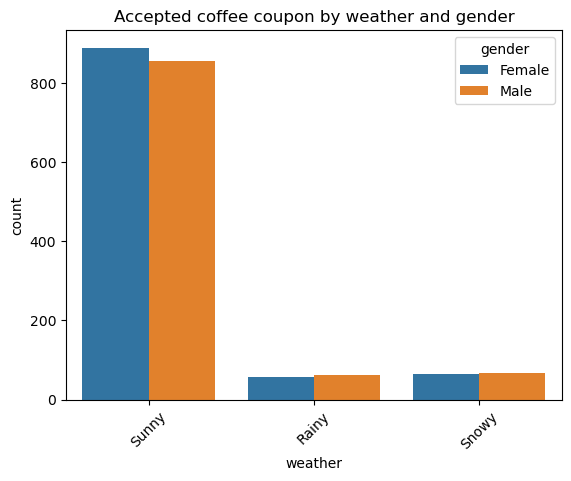

In [86]:
accepted = coffee_df.query("Y ==1 ")

sns.countplot(accepted, x='weather', hue = 'gender')
plt.xticks(rotation=45)
plt.title("Accepted coffee coupon by weather and gender")
plt.savefig('graphs/coffee_accept_weather.png')

6. Illustrate graphically how many male and females who accepted the coffee coupon

In [87]:
coffee_df.query("Y ==1 ")["gender"].value_counts()

gender
Female    1010
Male       985
Name: count, dtype: int64

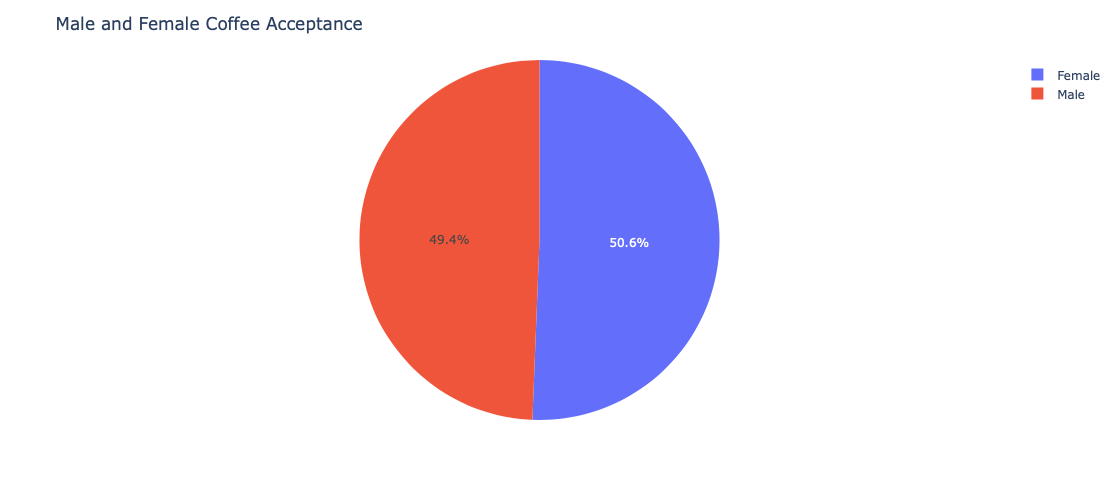

In [88]:
# Create a dataframe of these numbers
gender_counts = [['Male', 985],['Female', 1010]]
gender_coffee = pd.DataFrame(gender_counts, columns=['Gender', 'Numbers'])

pie_chart = px.pie(gender_coffee, values='Numbers', names='Gender')
pie_chart.update_layout(
    title_text="Male and Female Coffee Acceptance",    autosize=False,
    width=500,
    height=500)
pie_chart.show()

7. Summary

- We can see that out of those who accepted the coffee coupon 50.6% is female while 49.4% male.
- We can also see that a significant number of people accepted coffee coupon on a sunny day over any other weather
- Out of all who accepted the coffee coupon, 17.3% of them are heading to work on a sunny day
- 10% of people that accepted the coffee coupon are heading to work
- 49% of those with a coffee coupon accepted it.